In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
!unzip "/content/drive/My Drive/DEP_TRAINING DATASET.zip"
!unzip "/content/drive/My Drive/DEP_VALIDATION DATASET.zip"
!unzip "/content/drive/My Drive/DEP_TEST DATASET.zip"

Archive:  /content/drive/My Drive/DEP_TRAINING DATASET.zip
   creating: DEP_TRAINING DATASET/
  inflating: DEP_TRAINING DATASET/.DS_Store  
  inflating: __MACOSX/DEP_TRAINING DATASET/._.DS_Store  
   creating: DEP_TRAINING DATASET/CONDITION/
   creating: DEP_TRAINING DATASET/CONTROL/
  inflating: DEP_TRAINING DATASET/CONDITION/cond9.png  
  inflating: __MACOSX/DEP_TRAINING DATASET/CONDITION/._cond9.png  
  inflating: DEP_TRAINING DATASET/CONDITION/cond8.png  
  inflating: __MACOSX/DEP_TRAINING DATASET/CONDITION/._cond8.png  
  inflating: DEP_TRAINING DATASET/CONDITION/.DS_Store  
  inflating: __MACOSX/DEP_TRAINING DATASET/CONDITION/._.DS_Store  
  inflating: DEP_TRAINING DATASET/CONDITION/cond18.png  
  inflating: __MACOSX/DEP_TRAINING DATASET/CONDITION/._cond18.png  
  inflating: DEP_TRAINING DATASET/CONDITION/cond21.png  
  inflating: __MACOSX/DEP_TRAINING DATASET/CONDITION/._cond21.png  
  inflating: DEP_TRAINING DATASET/CONDITION/cond20.png  
  inflating: __MACOSX/DEP_TRAINING DATA

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [ ]:
train=ImageDataGenerator(rescale=1/255)
train_dataset=train.flow_from_directory("DEP_TRAINING DATASET",target_size=(200,200),color_mode="grayscale")
Valid=ImageDataGenerator(rescale=1/255)
Valid_dataset=Valid.flow_from_directory("DEP_VALIDATION DATASET",target_size=(200,200),color_mode="grayscale")

Found 26 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


**LeNet**

In [ ]:
from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
import keras
import keras.utils
from keras import utils as np_utils
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D


In [ ]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='tanh', input_shape=(200,200,1)))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=2, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 198, 198, 6)       60        
                                                                 
 average_pooling2d (AverageP  (None, 99, 99, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_3 (Conv2D)           (None, 97, 97, 16)        880       
                                                                 
 average_pooling2d_1 (Averag  (None, 48, 48, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 36864)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_dataset,epochs=20,validation_data=Valid_dataset)

Epoch 1/20
1/1 [==============================] - 6s 6s/step - loss: 0.7906 - accuracy: 0.5000 - val_loss: 3.8861 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 4s 4s/step - loss: 3.8861 - accuracy: 0.5000 - val_loss: 3.7052 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 4s 4s/step - loss: 3.7052 - accuracy: 0.5000 - val_loss: 3.5810 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 4s 4s/step - loss: 3.5810 - accuracy: 0.5000 - val_loss: 3.4825 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 4s 4s/step - loss: 3.4825 - accuracy: 0.5000 - val_loss: 3.3995 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 4s 4s/step - loss: 3.3995 - accuracy: 0.5000 - val_loss: 3.3273 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 4s 4s/step - loss: 3.3273 - accuracy: 0.5000 - val_loss: 3.2631 - val_accuracy: 0.5000
Epoch 8/20
1/1 [=========================

In [ ]:

validation_generator = Valid.flow_from_directory("DEP_VALIDATION DATASET",target_size=(200,200),color_mode="grayscale")
Y_pred = model.predict_generator(validation_generator)
ytrue = np.argmax(Y_pred, axis=1).tolist()
ytrue

Found 12 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, ytrue))
accuracy_score(validation_generator.classes, ytrue)

[[6 0]
 [6 0]]


0.5

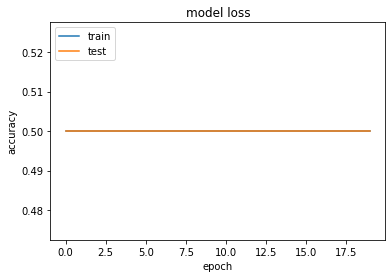

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**ResNet**

In [ ]:
train=ImageDataGenerator(rescale=1/255)
train_dataset=train.flow_from_directory("DEP_TRAINING DATASET",target_size=(200,200))
Valid=ImageDataGenerator(rescale=1/255)
Valid_dataset=Valid.flow_from_directory("DEP_VALIDATION DATASET",target_size=(200,200))

Found 26 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [ ]:
import tensorflow
from tensorflow import keras
import tensorflow.keras.applications

In [ ]:
res101_layers=tensorflow.keras.applications.resnet50.ResNet50(weights='imagenet',include_top=False,input_shape=(200,200,3),pooling='max')

res101_layers.summary()
#from tensorflow.keras.callbacks import EarlyStopping
#callback=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)

for layer in res101_layers.layers:
  layer.trainable=True

for layer in res101_layers.layers:
  print(layer,layer.trainable)
 
 
model_res101=keras.models.Sequential()
model_res101.add(res101_layers)
model_res101.add(keras.layers.Flatten())
model_res101.add(keras.layers.Dense(1024,activation='relu'))
model_res101.add(keras.layers.Dropout(0.3))
model_res101.add(keras.layers.Dense(768,activation='relu'))
model_res101.add(keras.layers.Dropout(0.3))
model_res101.add(keras.layers.Dense(256,activation='relu'))
model_res101.add(keras.layers.Dropout(0.3))
model_res101.add(keras.layers.Dense(2,activation='softmax'))

model_res101.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='BinaryCrossentropy',metrics=['accuracy'])
 
result_res101=model_res101.fit(train_dataset,validation_data=Valid_dataset,epochs=20)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

KeyboardInterrupt: ignored

In [ ]:
validation_generator = Valid.flow_from_directory("DEP_VALIDATION DATASET",target_size=(200,200))
Y_pred = model_res101.predict_generator(validation_generator)
ytrue = np.argmax(Y_pred, axis=1).tolist()
ytrue

Found 5 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


[0, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, ytrue))
accuracy_score(validation_generator.classes, ytrue)

[[2 0]
 [3 0]]


0.4

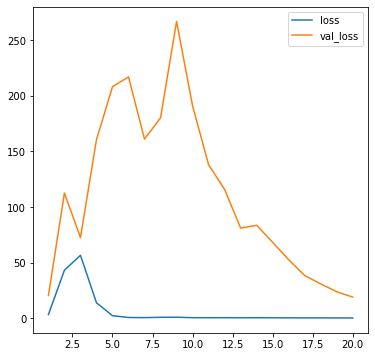

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6)) 
loss1=result_res101.history['loss']
val_loss1=result_res101.history['val_loss']
epochs=range(1,len(loss1)+1)
plt.plot(epochs,loss1,label='loss')
plt.plot(epochs,val_loss1,label='val_loss')
plt.legend()

**VGG**

In [ ]:
from tensorflow import keras
vgg_layers=keras.applications.vgg19.VGG19(weights='imagenet',include_top=False,input_shape=(200,200,3))

vgg_layers.summary()
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)

for layer in vgg_layers.layers:
  layer.trainable=True

for layer in vgg_layers.layers:
  print(layer,layer.trainable)
 
 
model_vgg=keras.models.Sequential()
model_vgg.add(vgg_layers)
model_vgg.add(keras.layers.Flatten())
model_vgg.add(keras.layers.Dense(1024,activation='relu'))
model_vgg.add(keras.layers.Dropout(0.3))
model_vgg.add(keras.layers.Dense(768,activation='relu'))
model_vgg.add(keras.layers.Dropout(0.3))
model_vgg.add(keras.layers.Dense(256,activation='relu'))
model_vgg.add(keras.layers.Dropout(0.3))
model_vgg.add(keras.layers.Dense(2,activation='softmax'))


model_vgg.compile(optimizer=RMSprop(learning_rate= 0.001),
                loss='categorical_crossentropy',metrics=['accuracy'])
 
result=model_vgg.fit(train_dataset,validation_data=Valid_dataset,epochs=20)

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                              

In [ ]:
validation_generator = Valid.flow_from_directory("DEP_VALIDATION DATASET",target_size=(200,200))
Y_pred = model_res101.predict_generator(validation_generator)
ytrue = np.argmax(Y_pred, axis=1).tolist()
ytrue

Found 12 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, ytrue))
accuracy_score(validation_generator.classes, ytrue)

[[6 0]
 [6 0]]


0.5

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  #tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  #tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  #tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  #tf.keras.layers.MaxPool2D(2,2),
                                  

                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(64,activation='relu'),
                                  tf.keras.layers.Dense(2,activation='softmax')])

model.compile(optimizer=RMSprop(learning_rate=0.001)
    ,loss='BinaryCrossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_dataset,epochs=20,validation_data=Valid_dataset)

Epoch 1/20
1/1 [==============================] - 8s 8s/step - loss: 0.7020 - accuracy: 0.5000 - val_loss: 29.3421 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 5s 5s/step - loss: 29.2511 - accuracy: 0.5000 - val_loss: 4.4214 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 5s 5s/step - loss: 4.4163 - accuracy: 0.5000 - val_loss: 3.4022 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 5s 5s/step - loss: 3.3973 - accuracy: 0.5000 - val_loss: 0.8893 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 5s 5s/step - loss: 0.8873 - accuracy: 0.5000 - val_loss: 1.0096 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 5s 5s/step - loss: 1.0078 - accuracy: 0.5000 - val_loss: 0.7261 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 5s 5s/step - loss: 0.7234 - accuracy: 0.5000 - val_loss: 1.5061 - val_accuracy: 0.5000
Epoch 8/20
1/1 [=======================

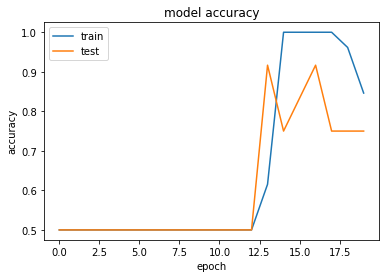

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:

validation_generator = Valid.flow_from_directory("DEP_VALIDATION DATASET",target_size=(200,200))

Found 12 images belonging to 2 classes.


In [ ]:
Y_pred = model.predict_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:

Y_pred

array([[0.47727278, 0.5227272 ],
       [0.5191144 , 0.48088562],
       [0.4907344 , 0.5092656 ],
       [0.5204686 , 0.47953144],
       [0.46304664, 0.53695333],
       [0.43757504, 0.5624249 ],
       [0.45535225, 0.5446478 ],
       [0.5008619 , 0.49913812],
       [0.46243745, 0.5375625 ],
       [0.41029137, 0.58970857],
       [0.43786275, 0.56213725],
       [0.4534982 , 0.5465018 ]], dtype=float32)

In [ ]:
ytrue = np.argmax(Y_pred, axis=1).tolist()

In [ ]:
ytrue

[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]

In [ ]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, ytrue))
accuracy_score(validation_generator.classes, ytrue)

[[2 4]
 [1 5]]


0.5833333333333334

In [ ]:
def map(evl):
  if(evl[0][0]>evl[0][1]):
    ans='Condition'
  else:
    ans='Control'
  print(ans)

In [ ]:
from keras.preprocessing import image
img3=image.load_img("/Users/ishaan/Datasets/OTHER_DATA/depression_NEW/DEP_TEST DATASET/CONDITION/cond19.png",target_size=(200,200))
x=image.img_to_array(img3)
x = np.expand_dims(x, axis=0)
evl=model.predict(x)
evl

<BarContainer object of 4 artists>

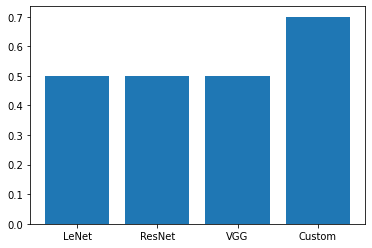

In [ ]:
test_loss=[0.5,0.5,0.5,0.7]
models=['LeNet','ResNet','VGG',"Custom"]
plt.bar(models,test_loss)